# Ford GoBike System 
## by Osama Salem

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.[3] Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [32]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [33]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [35]:
#Change start_time and end_time to datetime
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [36]:
#Change bike_share_for_all_trip to boolean
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [11]:
df.shape

(183412, 16)

In [12]:
# Finding how many bikes there are in this dataset
df.bike_id.nunique()

4646

In [28]:
df['member_birth_year'] = df['member_birth_year'].dropna(inplace= True)

In [21]:
df['member_birth_year'] = pd.to_datetime(df['member_birth_year'])

In [37]:
# Creating an Age based column.
df['user_age'] = 2020 - df['member_birth_year']

In [38]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,36.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,False,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,48.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,31.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,46.0


### What is the structure of your dataset?

> There are 183412 rows (fordgobike trips), 4646 bikes. The trips in the dataset have 16 variables (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip) two of them are datetime, four are object type and 1 is bolean type and the rest are numerical.

### What is/are the main feature(s) of interest in your dataset?

> I'm mostly interested in finding out the variables impacting the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the trip duration is mostly impacted by the start stations and end stations also user_type, birthyear and gender should also effect trip duration.

## Univariate Exploration


#### Average bike trip in seconds

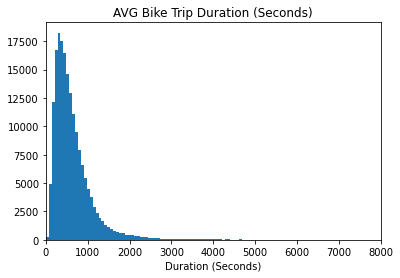

In [18]:
#Plotting of the average trip duration as a main variable.

bin_edges = np.arange(0, df['duration_sec'].max() + 100 , 70)
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('AVG Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

there isn't much to look into so let's try to convert the seconds into minutes so we can have a better look at the distrubtion

In [17]:
# Converting the seconds to minutes.
df['duration_min'] = df['duration_sec'] / 60

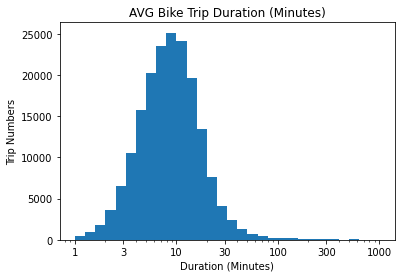

In [19]:
#Let's put it into log scale for better look at the distrubtion
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('AVG Bike Trip Duration (Minutes)');
plt.ylabel('Trip Numbers');

##### We can see that the majority lasting below the 10 minutes mark and the average trip lasts between 1 and around 100 minutes

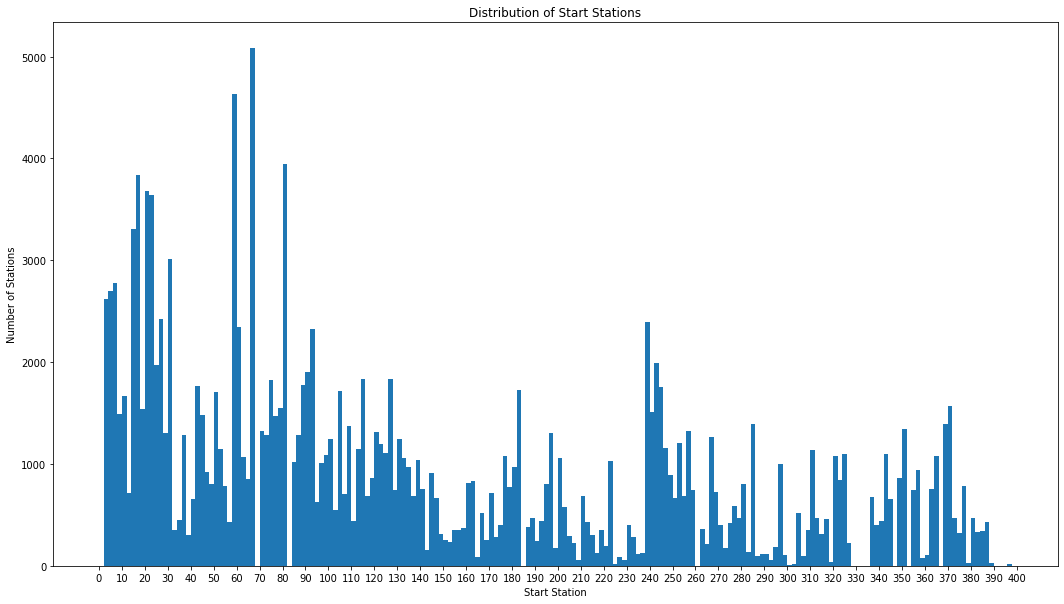

In [70]:
# The distrubtion of  start station id.
binsize = 2
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[18, 10])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations');

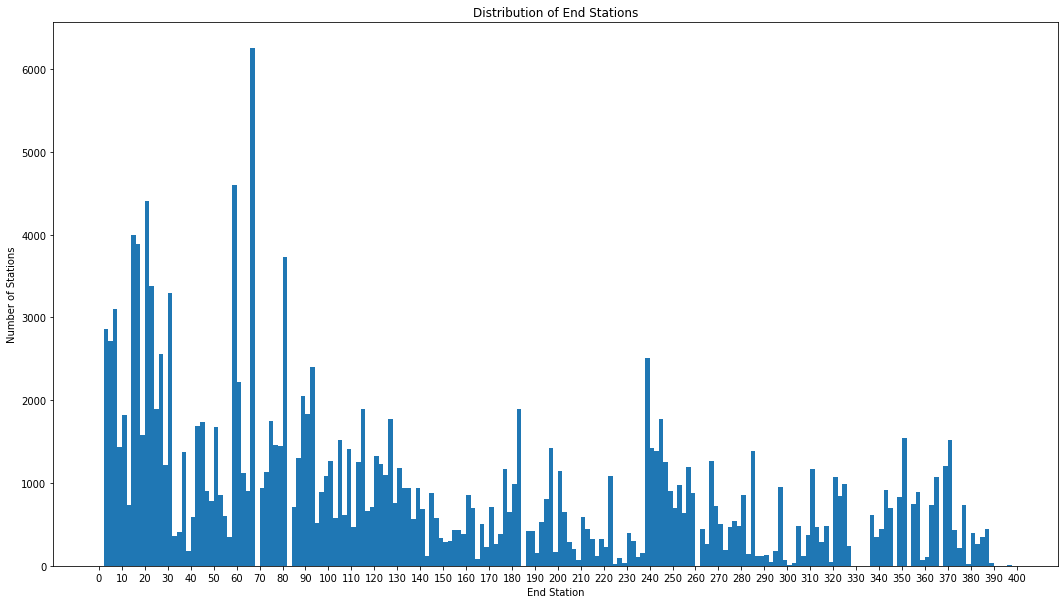

In [69]:
# The distrution of end station id.
binsize = 2
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[18, 10])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations');

It is obvious that some station are frequent as start station and end station.

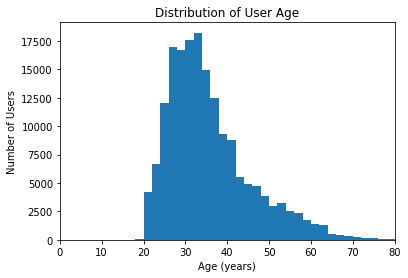

In [40]:
# The age distribution derived from member's birth year.
bin_size = 2
bins = np.arange(0, df['user_age'].max()+binsize, bin_size)
plt.hist(data = df.dropna(), x = 'user_age', bins = bins)
plt.xlim(0,80)
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users');

The majority of the distrubtion is between the age of 20 to 40 years old

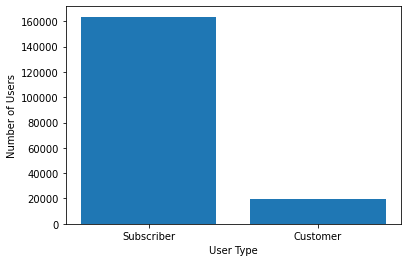

In [35]:
# The distrubtion of types of users.
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.xlabel('User Type')
plt.ylabel('Number of Users');

We can see that the majority of trips are led by Subscribers rather than Customers.

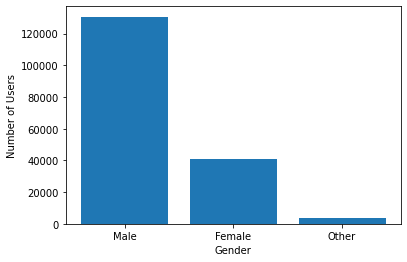

In [36]:
# The distrubtion of genders of users.
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users');

The male users are dominating the trips with more than 12000 users while the females are around or slightly more 4000 users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration intial visulization was concentrated around an area so I changed the trip by seconds to minutes and used log transform for a better look at the data.

> Creating user_age column to be able get an insight on the impact of age.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Looking at the distrubtion of birth year was challenging, so with a little guidance I came to the idea of looking at the distrubtion by age and to do so, I converted to it by substracting the birth year from current year which gave us a better percetion of the impact of age on the trip duration.

## Bivariate Exploration


The correlation between trip duration and age.

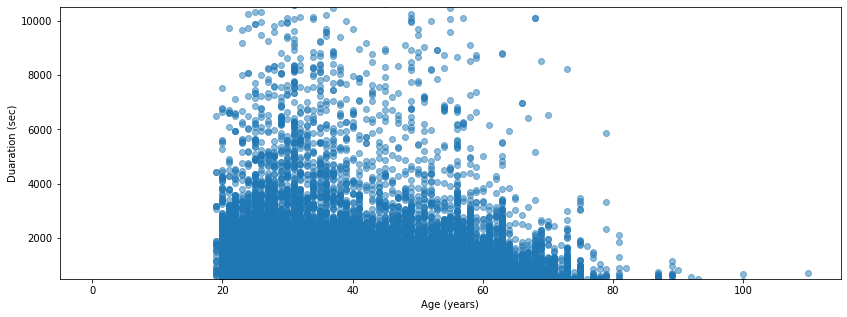

In [55]:
plt.figure(figsize=[14,5])
plt.scatter(df['user_age'], df['duration_sec'], alpha = 0.5, marker = 'o' )
plt.axis([-5, 115, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)');

Most trips are below age of 80 and 6000 seconds so we need to dive deeper and look at the distrubtion within these values

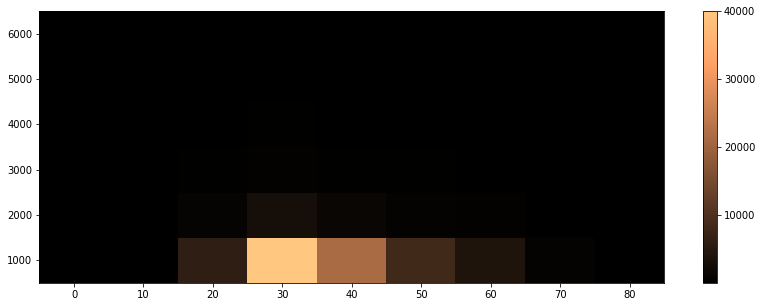

In [68]:
plt.figure(figsize=[14,5])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(df['user_age'], df['duration_sec'],
           bins = [bins_x, bins_y],cmap='copper')
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);

We can see that the majority of users are between 15 to 45 years old with concentrated high duartion of trips around the age of 30 years old.

##### Let's look at the impact of both start station and end station on trip duration

In [82]:
df.start_station_id.nunique()

329

In [82]:
st = []
every_start_station_ids = sorted(df.start_station_id.unique())
for x in every_start_station_ids:
    st.append(df[df.start_station_id == x].duration_sec.sum())
total_duration = pd.Series(st)

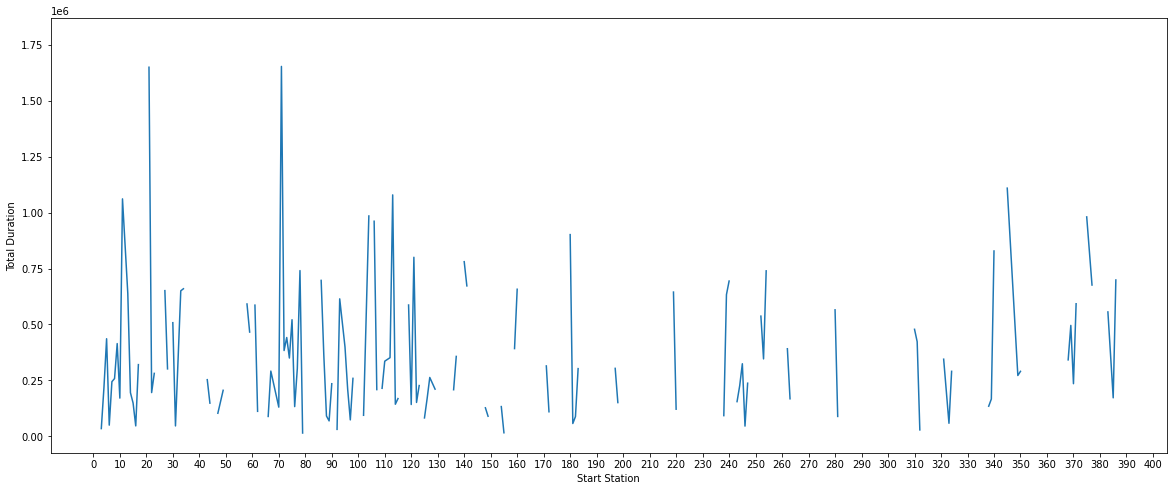

In [81]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'].dropna(), y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('Start Station')
plt.ylabel('Total Duration');

In [78]:
st = []

every_end_station_ids = sorted(df.end_station_id.unique())
for x in every_end_station_ids :
    st.append(df[df.end_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(st)

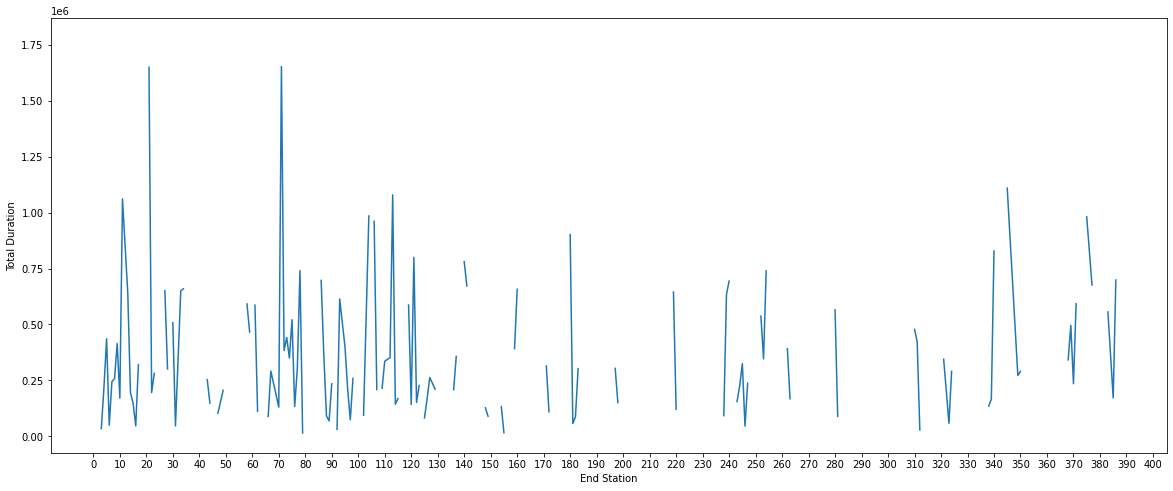

In [79]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('End Station')
plt.ylabel('Total Duration');

We can see that the duration for some stations as a start station for some are higher and for others as end stations are higher.

Also we can detect a pattern of stations which might result in longer trip duration.

##### The correlation between trip duration and both gender and member type

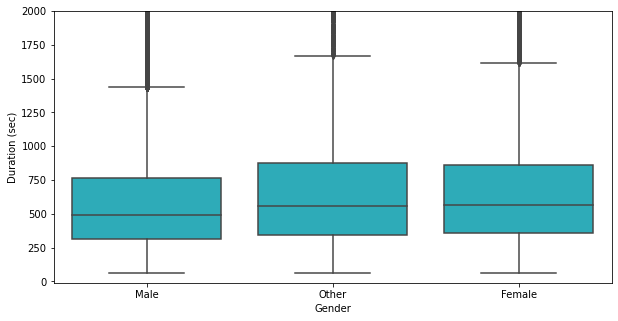

In [93]:
plt.figure(figsize = [10, 5])
vis_color = sb.color_palette()[9]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = vis_color)
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)');

The amount of male riders are obviously higher than the others but the longer trips came from other and females more than males

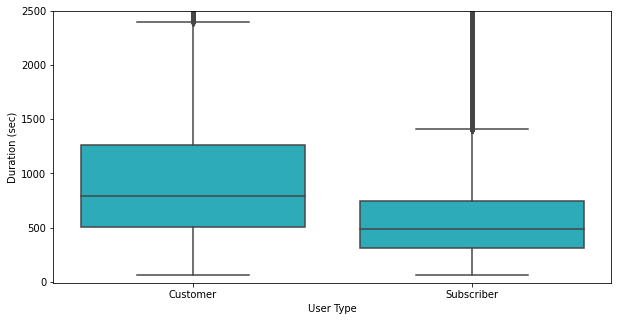

In [94]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[9]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');

We can see that the longer trips were preformed more by Customers more than Subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Since an activity like riding a bike is correlated with health so it's expected that the user's age is contributing the trip duration and as observed that the majority of long trips came from users between the age of 20 to 40 years old.

> On the Other hand, Start station and end station's observation didn't yeild much to determine the trip duration. We only came to the conclusion that some stations leads to longer trip duration as a starting station while others lead to longer duration as ending station. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Gender: the intial observation led that male users are more than the others but diving deeper revealed that while males take more trips, females and other have higher percentage of leading a longer trip than males.

> User Type: While Subscribers have higher number of users than the others, looking at the correlation regarding longer durations of trips led to the conclusion that customers have higher percentage of leading a longer duration.

## Multivariate Exploration

> Here we will explore the how both gender and user type (two categorical variables)

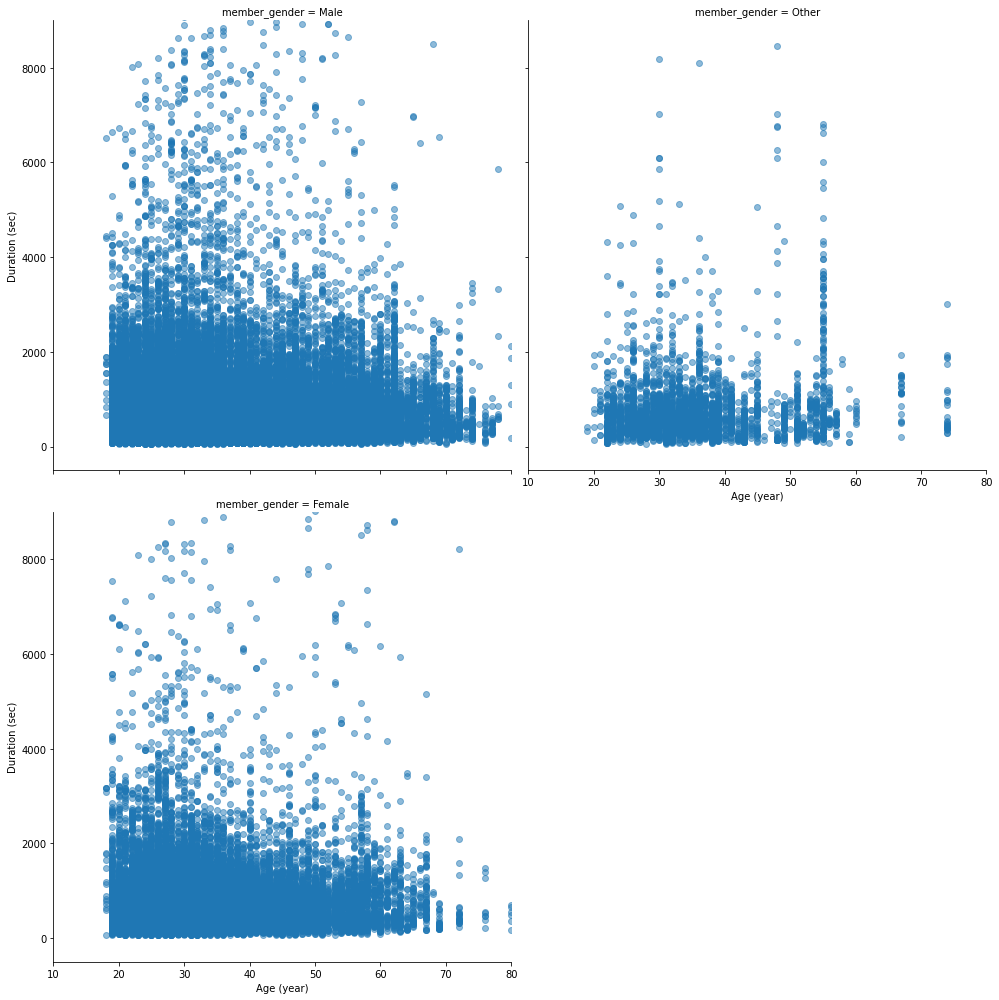

In [99]:
df['age'] = (2019 - df['member_birth_year'])
genders = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, height = 7,
                 xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.5)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)');

we can see a more frequent longer duration for Other between the age of 50 to 60 years old

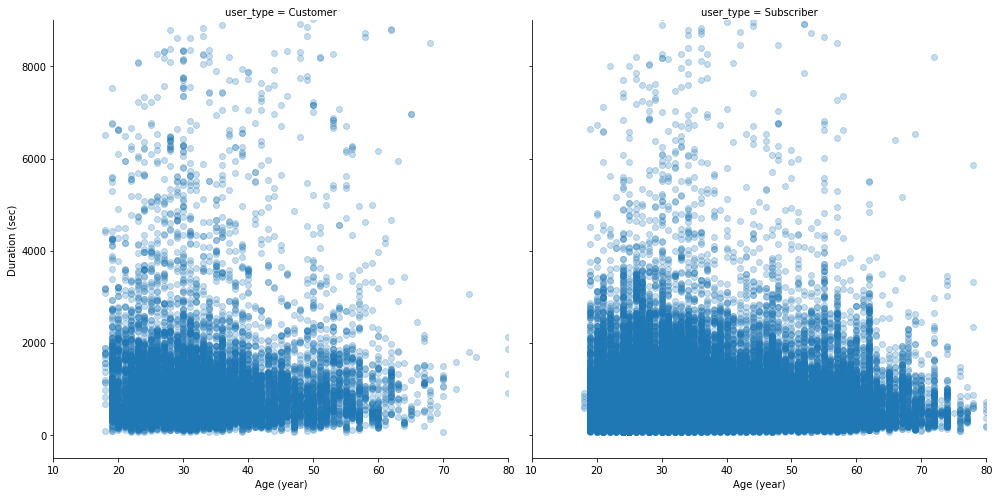

In [104]:
user_types = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, height = 7,
                 xlim = [10, 80], ylim = [-500, 9000])
user_types.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration (sec)');

We can see that both Customer and Subscriber are the same regarding the trends for age and trip duration

It's noticeable that there is a slightly higher age for subscribers having higher duration trips than customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here we reached the conclution that even though the number of higher duration trip is higher for male but percentage is higher for women and other, also other has one more peak at nearly the age of 60 years for higher duration time. 

>Regarding different user types both are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers having better trip duration.

### Were there any interesting or surprising interactions between features?

> The peak for other gender at older age.

> The slight tilt to higher age for subscribers having better trip duration.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!